Prediction of Mohs hardness of a mineral

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mohs Hardness Dataset.csv')

In [4]:
data.isnull().count()

id                       10407
allelectrons_Total       10407
density_Total            10407
allelectrons_Average     10407
val_e_Average            10407
atomicweight_Average     10407
ionenergy_Average        10407
el_neg_chi_Average       10407
R_vdw_element_Average    10407
R_cov_element_Average    10407
zaratio_Average          10407
density_Average          10407
Hardness                 10407
dtype: int64

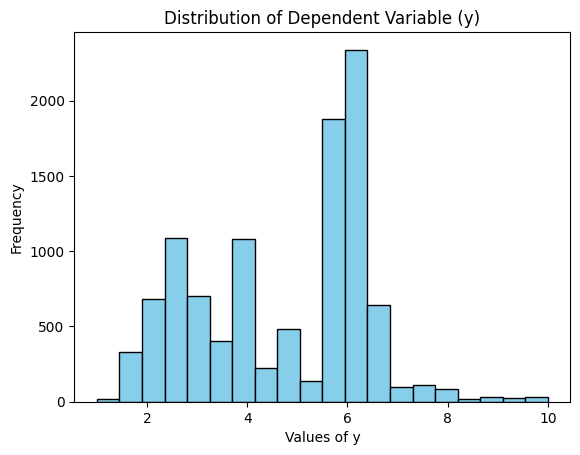

In [5]:
plt.hist(data['Hardness'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Dependent Variable (y)')
plt.xlabel('Values of y')
plt.ylabel('Frequency')
plt.show()

In [6]:
data.head()


,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [7]:
X = data.iloc[:,1:12]

In [8]:
X.head()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481


In [9]:
y= data.iloc[:,12]

In [10]:
y.head()

0    6.0
1    6.5
2    2.5
3    6.0
4    6.0
Name: Hardness, dtype: float64

In [11]:
correlation_matrix = X.corr()

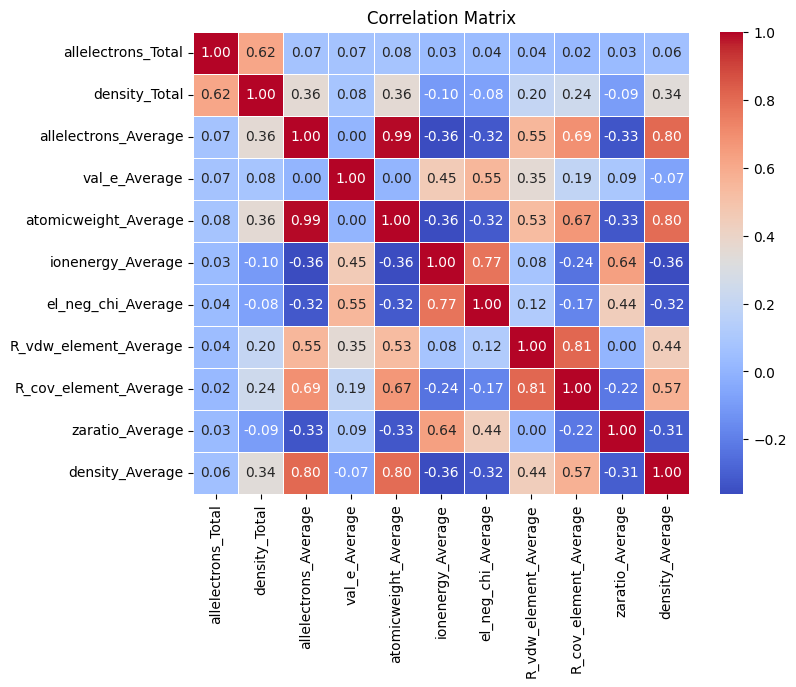

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
columns_to_drop = ['allelectrons_Average', 'atomicweight_Average','ionenergy_Average','R_cov_element_Average']

In [14]:
df = X.drop(columns = columns_to_drop, axis=1)

In [15]:
df.head()

,allelectrons_Total,density_Total,val_e_Average,el_neg_chi_Average,R_vdw_element_Average,zaratio_Average,density_Average
0,100.0,0.841611,4.8,2.766,1.732,0.496070,0.91457
1,100.0,7.558488,4.8,2.755,1.631,0.492719,0.71760
2,76.0,8.885992,5.6,2.828,1.788,0.481478,1.50633
3,100.0,8.795296,4.8,2.648,1.626,0.489272,0.78937
4,116.0,9.577996,4.8,2.766,1.682,0.492736,1.86481


In [16]:
df.describe()

,allelectrons_Total,density_Total,val_e_Average,el_neg_chi_Average,R_vdw_element_Average,zaratio_Average,density_Average
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,4.546789,2.607662,1.731330,0.493349,2.132984
std,224.123776,15.972877,0.690864,0.334906,0.192481,0.063080,1.936656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,7.558488,4.000000,2.530000,1.672500,0.476196,0.814800
50%,100.000000,10.650000,4.714286,2.706000,1.732727,0.488550,1.351550
75%,131.000000,16.676996,4.800000,2.805000,1.800000,0.496070,2.741550
max,15300.000000,643.093804,6.000000,3.443000,2.250000,0.825990,10.970000


In [17]:
df.describe(include = 'all')

,allelectrons_Total,density_Total,val_e_Average,el_neg_chi_Average,R_vdw_element_Average,zaratio_Average,density_Average
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,4.546789,2.607662,1.731330,0.493349,2.132984
std,224.123776,15.972877,0.690864,0.334906,0.192481,0.063080,1.936656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,7.558488,4.000000,2.530000,1.672500,0.476196,0.814800
50%,100.000000,10.650000,4.714286,2.706000,1.732727,0.488550,1.351550
75%,131.000000,16.676996,4.800000,2.805000,1.800000,0.496070,2.741550
max,15300.000000,643.093804,6.000000,3.443000,2.250000,0.825990,10.970000


In [18]:
correlation_matrix = df.corr()

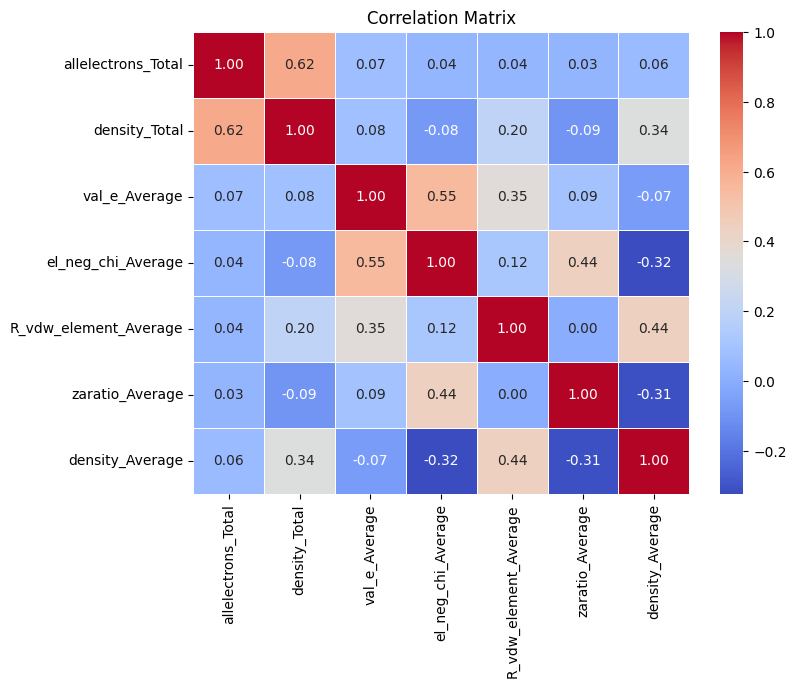

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 0)


In [34]:
model = lgb.LGBMRegressor(
    objective='regression',  # 'regression' for regression tasks
    metric='mse',  # Mean Squared Error (MSE) as the evaluation metric
    num_leaves=51,  # Maximum number of leaves in one tree
    learning_rate=0.05,  # Step size to prevent overfitting
    n_estimators=100  # Number of boosting rounds
)

In [35]:
# Train the model
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1549
[LightGBM] [Info] Number of data points in the train set: 8325, number of used features: 7
[LightGBM] [Info] Start training from score 4.652527


LGBMRegressor(learning_rate=0.05, metric='mse', num_leaves=51,
              objective='regression')

In [36]:
y_pred = model.predict(X_test)


In [37]:
mse = mean_squared_error(y_test, y_pred)

In [38]:
mse

1.5485889934007524

In [39]:
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test (1).csv')

In [40]:
sample.isnull().count()

id                       6939
allelectrons_Total       6939
density_Total            6939
allelectrons_Average     6939
val_e_Average            6939
atomicweight_Average     6939
ionenergy_Average        6939
el_neg_chi_Average       6939
R_vdw_element_Average    6939
R_cov_element_Average    6939
zaratio_Average          6939
density_Average          6939
dtype: int64

In [41]:
columns_to_drops = ['id','allelectrons_Average', 'atomicweight_Average','ionenergy_Average','R_cov_element_Average']

In [42]:
sample = sample.drop(columns = columns_to_drops, axis=1)

In [43]:
sample_pred = model.predict(sample)

In [46]:
type(sample_pred)

numpy.ndarray

In [49]:
df1 = pd.DataFrame(sample_pred)

In [50]:
df1.to_csv('sample_submission.csv')